<div class="alert alert-block alert-warning">
Planning - Acquisition - Preparation - Exploratory Analysis - <font color='red'><b>Modeling</b></font> - Product Delivery
</div>

# Decision Tree Exercises
Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

In [1]:
import pandas as pd
import numpy as np
import os
from pydataset import data

import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

# Decision Tree and Model Evaluation Imports
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

from env import get_db_url
import QMCBT_prepare as prepare
import QMCBT_acquire as acquire
import QMCBT_evaluate as evaluate

# DECISION TREE TEMPLATE

```
_______________________________________________________________
|                              DF                             |
|-------------------|-------------------|---------------------|
|       Train       |       Validate    |          Test       |
|-------------------|-------------------|-----------|---------|
| x_train | y_train |   x_val  |  y_val |   x_test  |  y_test |
|-------------------|-------------------|-----------|---------|
```
* 1. tree_1 = DecisionTreeClassifier(max_depth = 5)
* 2. tree_1.fit(x_train, y_train)
* 3. predictions = tree_1.predict(x_train)
* 4. pd.crosstab(y_train, predictions)
* 5. val_predictions = tree_1.predict(x_val)
* 6. pd.crosstab(y_val, val_predictions)

# Acquire

In [2]:
titanic_df = acquire.get_titanic_df()
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


# Prepare

In [3]:
titanic_df = prepare.prep_titanic_df(titanic_df)
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,embark_town,alone,male,Cherbourg,Queenstown,Southampton
0,0,3,male,22.0,1,0,7.2500,S,Southampton,0,1,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,Cherbourg,0,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,Southampton,1,0,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,Southampton,0,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,Southampton,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Southampton,1,1,0,0,1
887,1,1,female,19.0,0,0,30.0000,S,Southampton,1,0,0,0,1
888,0,3,female,NaN,1,2,23.4500,S,Southampton,0,0,0,0,1
889,1,1,male,26.0,0,0,30.0000,C,Cherbourg,1,1,1,0,0


In [4]:
target = 'survived'
train, validate, test = prepare.train_val_test_split(titanic_df, target)
train.head()

_______________________________________________________________
|                              DF                             |
|-------------------|-------------------|---------------------|
|       Train       |       Validate    |          Test       |
|-------------------|-------------------|-----------|---------|
| x_train | y_train |   x_val  |  y_val |   x_test  |  y_test |
|-------------------------------------------------------------|

* 1. tree_1 = DecisionTreeClassifier(max_depth = 5)
* 2. tree_1.fit(x_train, y_train)
* 3. predictions = tree_1.predict(x_train)
* 4. pd.crosstab(y_train, predictions)
* 5. val_predictions = tree_1.predict(x_val)
* 6. pd.crosstab(y_val, val_predictions)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,embark_town,alone,male,Cherbourg,Queenstown,Southampton
455,1,3,male,29.0,0,0,7.8958,C,Cherbourg,1,1,1,0,0
380,1,1,female,42.0,0,0,227.5250,C,Cherbourg,1,0,1,0,0
492,0,1,male,55.0,0,0,30.5000,S,Southampton,1,1,0,0,1
55,1,1,male,NaN,0,0,35.5000,S,Southampton,1,1,0,0,1
243,0,3,male,22.0,0,0,7.1250,S,Southampton,1,1,0,0,1


In [5]:
# Preprocessing for modeling (remove all OBJECT columns)(ensure no NaNs)
X_train = train.drop(columns=['survived','age', 'sex', 'embark_town', 'embarked'])
y_train = train.survived

X_validate = validate.drop(columns=['survived','age', 'sex', 'embark_town', 'embarked'])
y_validate = validate.survived

X_test = test.drop(columns=['survived','age', 'sex', 'embark_town', 'embarked'])
y_test = test.survived

In [6]:
X_train.head()

,pclass,sibsp,parch,fare,alone,male,Cherbourg,Queenstown,Southampton
455,3,0,0,7.8958,1,1,1,0,0
380,1,0,0,227.5250,1,0,1,0,0
492,1,0,0,30.5000,1,1,0,0,1
55,1,0,0,35.5000,1,1,0,0,1
243,3,0,0,7.1250,1,1,0,0,1


In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534 entries, 455 to 496
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pclass       534 non-null    int64  
 1   sibsp        534 non-null    int64  
 2   parch        534 non-null    int64  
 3   fare         534 non-null    float64
 4   alone        534 non-null    int64  
 5   male         534 non-null    uint8  
 6   Cherbourg    534 non-null    uint8  
 7   Queenstown   534 non-null    uint8  
 8   Southampton  534 non-null    uint8  
dtypes: float64(1), int64(4), uint8(4)
memory usage: 27.1 KB


In [8]:
# show survived (confirm index match with x_train)
y_train.head()
#y_train[:5]

455    1
380    1
492    0
55     1
243    0
Name: survived, dtype: int64

Check and confirm shape match between X and y train

In [9]:
X_train.shape, X_validate.shape, X_test.shape

((534, 9), (178, 9), (179, 9))

In [10]:
y_train.shape, y_validate.shape, y_test.shape

((534,), (178,), (179,))

### 1. What is your baseline prediction? 
### What is your baseline accuracy? 
* Remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). 
* When you make those predictions, what is your accuracy? This is your baseline accuracy.

### ANSWER:
* **Baseline Prediction** is all True or all False whichever has the highest result in actual
* **Baseline Accuracy** is the accuracy achieved if the prediction was always the baseline mode 

In [11]:
y_train.head(10)

455    1
380    1
492    0
55     1
243    0
314    0
300    1
488    0
707    1
184    1
Name: survived, dtype: int64

In [12]:
y_train.value_counts()

0    329
1    205
Name: survived, dtype: int64

In [13]:
# The mode of the target (0 = 329) is a great baseline
baseline = y_train.mode()

# Produce a boolean array with True representing a match between the baseline prediction and reality
baseline_prediction = (y_train == 0)

# baseline accuracy
baseline_accuracy = baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

Baseline accuracy: 0.62


### 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [14]:
# Make the model
tree1 = DecisionTreeClassifier(max_depth=3, random_state=1992)

# Fit the model (on train and only train)
tree1 = tree1.fit(X_train, y_train)

# Use the model
# We'll evaluate the model's performance on train, first
y_predictions = tree1.predict(X_train)

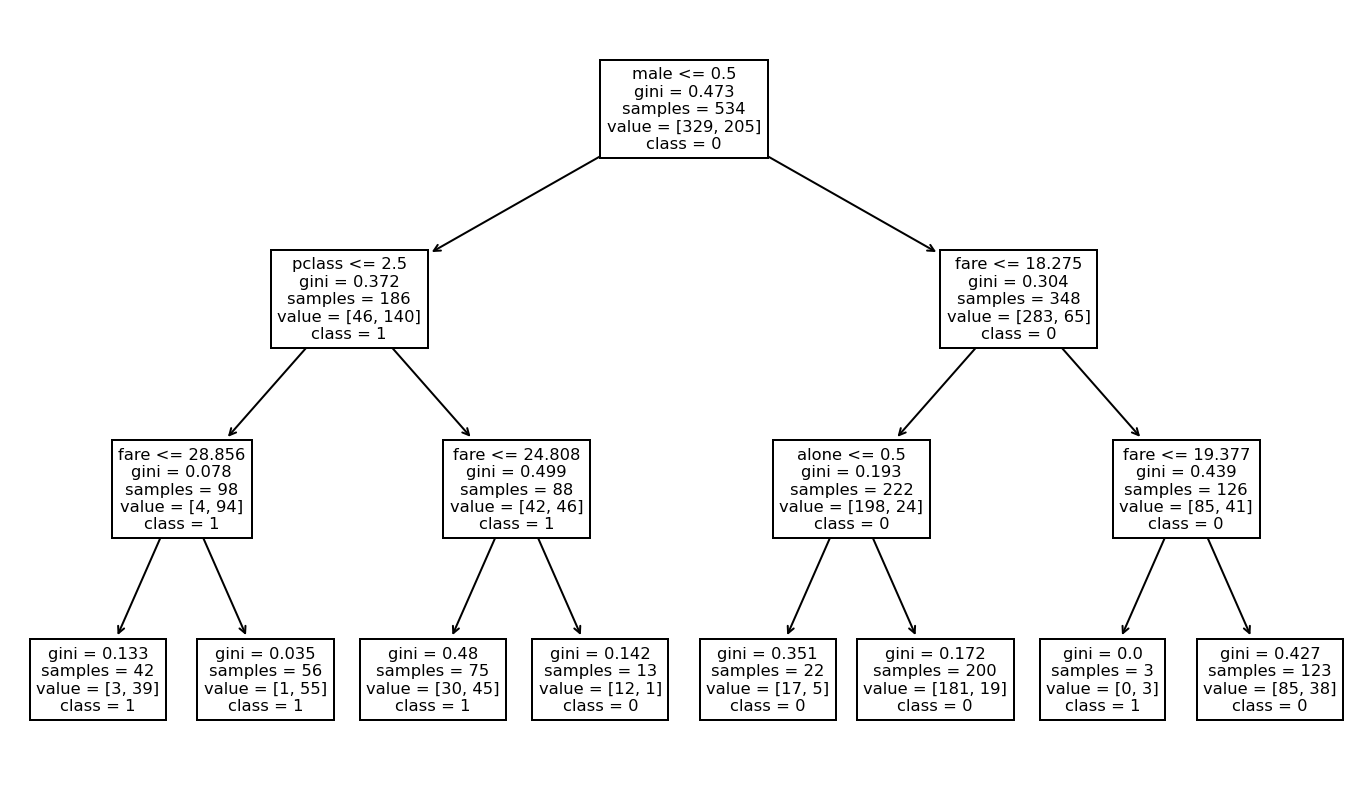

In [15]:
plt.figure(figsize=(12, 7))
plot_tree(tree1, feature_names=X_train.columns, class_names=['0','1'])
plt.show()

### 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [16]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(tree1.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.82


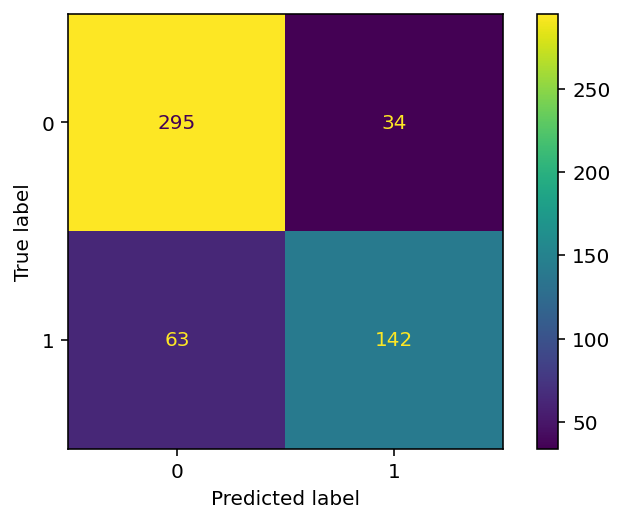

In [17]:
plot_confusion_matrix(tree1, X_train, y_train)

In [18]:
print(classification_report(y_train, y_predictions))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       329
           1       0.81      0.69      0.75       205

    accuracy                           0.82       534
   macro avg       0.82      0.79      0.80       534
weighted avg       0.82      0.82      0.82       534



In [19]:
# Produce the classification report 
# comparing the actual y values and this model's predicted y values
report = classification_report(y_train, y_predictions, output_dict = True)
print("Tree1 with max_depth(3)")
pd.DataFrame(report)

Tree1 with max_depth(3)


,0,1,accuracy,macro avg,weighted avg
precision,0.824022,0.806818,0.818352,0.815420,0.817418
recall,0.896657,0.692683,0.818352,0.794670,0.818352
f1-score,0.858806,0.745407,0.818352,0.802107,0.815273
support,329.000000,205.000000,0.818352,534.000000,534.000000


### 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

sklearn will base positive off the target in this case ```'survived'```

In [20]:
evaluate.print_class_metrics(y_train, y_predictions)

Accuracy: 0.8183520599250936
True Positive Rate: 0.6926829268292682
False Positive Rate: 0.1033434650455927
True Negative Rate: 0.8966565349544073
False Negative Rate: 0.3073170731707317
Precision: 0.8068181818181818
Recall: 0.6926829268292682
F1 Score: 0.7454068241469816
Support (0): 205
Support (1): 329


### 5. Run through steps 2-4 using a different ```max_depth``` value.

In [21]:
# Let's get loopy
# This will try max_depth at each value in the range
for i in range(1, 21):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=1992)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = tree.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict = True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Tree with max depth of 1
                    0           1  accuracy   macro avg  weighted avg
precision    0.813218    0.752688  0.792135    0.782953      0.789981
recall       0.860182    0.682927  0.792135    0.771555      0.792135
f1-score     0.836041    0.716113  0.792135    0.776077      0.790001
support    329.000000  205.000000  0.792135  534.000000    534.000000

Tree with max depth of 2
                    0           1  accuracy   macro avg  weighted avg
precision    0.813218    0.752688  0.792135    0.782953      0.789981
recall       0.860182    0.682927  0.792135    0.771555      0.792135
f1-score     0.836041    0.716113  0.792135    0.776077      0.790001
support    329.000000  205.000000  0.792135  534.000000    534.000000

Tree with max depth of 3
                    0           1  accuracy   macro avg  weighted avg
precision    0.824022    0.806818  0.818352    0.815420      0.817418
recall       0.896657    0.692683  0.818352    0.794670      0.818352
f1-score     

### 6. Which model performs better on your in-sample data?

max_depth of 15-20 produced the highest accuracy of 0.945693

### 7. Which model performs best on your out-of-sample data, the ```validate``` set?

In [22]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []

for i in range(1, 31):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=1992)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
metrics_df = pd.DataFrame(metrics)
metrics_df["difference"] = metrics_df.train_accuracy - metrics_df.validate_accuracy
metrics_df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.792135,0.775281,0.016854
1,2,0.792135,0.775281,0.016854
2,3,0.818352,0.792135,0.026217
3,4,0.820225,0.792135,0.028090
4,5,0.833333,0.730337,0.102996
5,6,0.859551,0.775281,0.084270
6,7,0.865169,0.769663,0.095506
7,8,0.900749,0.775281,0.125468
8,9,0.913858,0.758427,0.155431
9,10,0.925094,0.758427,0.166667


max_depth of 15-30 produced the highest accuracy of 0.945693 for train and 0.730337 for validate.

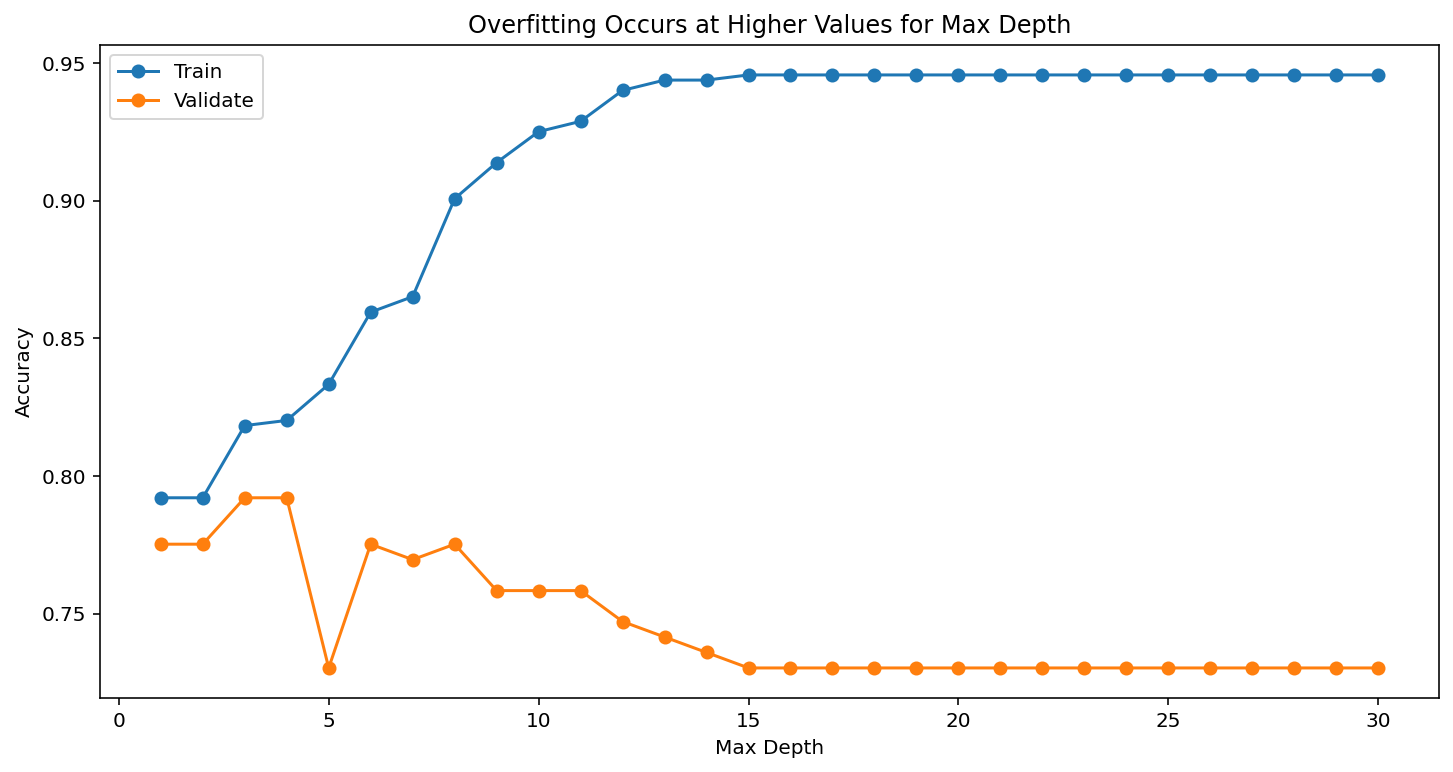

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(metrics_df.max_depth, metrics_df.train_accuracy, marker = 'o', label = 'Train')
plt.plot(metrics_df.max_depth, metrics_df.validate_accuracy, marker = 'o', label = 'Validate')
plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
metrics_df[metrics_df.difference <= 0.10].sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True])

,max_depth,train_accuracy,validate_accuracy,difference
2,3,0.818352,0.792135,0.026217
3,4,0.820225,0.792135,0.028090
0,1,0.792135,0.775281,0.016854
1,2,0.792135,0.775281,0.016854
5,6,0.859551,0.775281,0.084270
6,7,0.865169,0.769663,0.095506


**```max_depth```** of **3** has the highest validate accuracy with the lowest difference between validate and train.

# EXTRA

### 1. Work through these same exercises using the Telco dataset.

### 2. Experiment with this model on other datasets with a higher number of output classes.

<div class="alert alert-block alert-warning">
Planning - Acquisition - Preparation - Exploratory Analysis - <font color='red'><b>Modeling</b></font> - Product Delivery
</div>

# Random Forest Exercises
Continue working in your model file with ```titanic``` data to do the following:

## Acquire, Prepare, and Fit
* Already conducted during previous exercise above.

In [25]:
X_train.head()

,pclass,sibsp,parch,fare,alone,male,Cherbourg,Queenstown,Southampton
455,3,0,0,7.8958,1,1,1,0,0
380,1,0,0,227.5250,1,0,1,0,0
492,1,0,0,30.5000,1,1,0,0,1
55,1,0,0,35.5000,1,1,0,0,1
243,3,0,0,7.1250,1,1,0,0,1


In [26]:
y_train.head()

455    1
380    1
492    0
55     1
243    0
Name: survived, dtype: int64

### 1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [27]:
rf = RandomForestClassifier(min_samples_leaf=1,
                            max_depth=10,
                            random_state=1992)

In [28]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=1992)

In [29]:
y_preds = rf.predict(X_train)

### 2. Evaluate your results using the model score, confusion matrix, and classification report.

In [30]:
rf.score(X_train, y_train)

0.9419475655430711

In [31]:
print(confusion_matrix(y_train, y_preds))
print()
print(classification_report(y_train, y_preds))

[[323   6]
 [ 25 180]]

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       329
           1       0.97      0.88      0.92       205

    accuracy                           0.94       534
   macro avg       0.95      0.93      0.94       534
weighted avg       0.94      0.94      0.94       534



### 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [32]:
evaluate.print_class_metrics(y_train, y_preds)

Accuracy: 0.9419475655430711
True Positive Rate: 0.8780487804878049
False Positive Rate: 0.0182370820668693
True Negative Rate: 0.9817629179331308
False Negative Rate: 0.12195121951219512
Precision: 0.967741935483871
Recall: 0.8780487804878049
F1 Score: 0.9207161125319694
Support (0): 205
Support (1): 329


### 4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.

In [33]:
# y_train is a Series
y_train

455    1
380    1
492    0
55     1
243    0
      ..
695    0
128    1
636    0
222    0
496    1
Name: survived, Length: 534, dtype: int64

In [34]:
X_train.columns

Index(['pclass', 'sibsp', 'parch', 'fare', 'alone', 'male', 'Cherbourg',
       'Queenstown', 'Southampton'],
      dtype='object')

In [35]:
# .columns will not work on Series
y_train.name

'survived'

In [36]:
# Create DF from Series 
y_train = pd.DataFrame(y_train)

In [37]:
# Now .columns will work
y_train.columns

Index(['survived'], dtype='object')

In [38]:
# Must ensure y_train is read in as DataFrame

model_prediction = y_train.copy()

for i in range(1, 6):
    for j in range(10, 5, -1):
        rf = RandomForestClassifier(min_samples_leaf=i,
                                    max_depth=j,
                                    random_state=1992)
        
        rf.fit(X_train, y_train)
        
        curr_preds = rf.predict(X_train)
        
        model_prediction[f'msl_{i}_md_{j}'] = curr_preds

In [39]:
model_prediction

,survived,msl_1_md_10,msl_1_md_9,msl_1_md_8,msl_1_md_7,msl_1_md_6,msl_2_md_10,msl_2_md_9,msl_2_md_8,msl_2_md_7,...,msl_4_md_10,msl_4_md_9,msl_4_md_8,msl_4_md_7,msl_4_md_6,msl_5_md_10,msl_5_md_9,msl_5_md_8,msl_5_md_7,msl_5_md_6
455,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
380,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
492,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55,1,1,1,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
243,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
128,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
636,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
222,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

In [40]:
# Must ensure y_train is read in as DataFrame

actuals = model_prediction.survived
preds = model_prediction.drop(columns = 'survived')

for column in preds.columns:
    
    accuracy = (actuals == preds[column]).mean()
    
    print(f'{column} accuracy: {accuracy}')

msl_1_md_10 accuracy: 0.9419475655430711
msl_1_md_9 accuracy: 0.9400749063670412
msl_1_md_8 accuracy: 0.9307116104868914
msl_1_md_7 accuracy: 0.9044943820224719
msl_1_md_6 accuracy: 0.8745318352059925
msl_2_md_10 accuracy: 0.8951310861423221
msl_2_md_9 accuracy: 0.898876404494382
msl_2_md_8 accuracy: 0.8876404494382022
msl_2_md_7 accuracy: 0.8801498127340824
msl_2_md_6 accuracy: 0.8782771535580525
msl_3_md_10 accuracy: 0.8745318352059925
msl_3_md_9 accuracy: 0.8782771535580525
msl_3_md_8 accuracy: 0.8782771535580525
msl_3_md_7 accuracy: 0.8782771535580525
msl_3_md_6 accuracy: 0.8595505617977528
msl_4_md_10 accuracy: 0.8745318352059925
msl_4_md_9 accuracy: 0.8689138576779026
msl_4_md_8 accuracy: 0.8707865168539326
msl_4_md_7 accuracy: 0.8707865168539326
msl_4_md_6 accuracy: 0.8614232209737828
msl_5_md_10 accuracy: 0.8520599250936329
msl_5_md_9 accuracy: 0.8520599250936329
msl_5_md_8 accuracy: 0.8539325842696629
msl_5_md_7 accuracy: 0.8632958801498127
msl_5_md_6 accuracy: 0.8464419475655

minimum_sample_leaf of 1 and max_depth of 10 provide the highest Accuracy


msl_1_md_10 accuracy: 0.9419475655430711
msl_1_md_9 accuracy: 0.9400749063670412

In [41]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.85


In [42]:
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))

Accuracy of random forest classifier on validate set: 0.80


### After making a few models, which one has the best performance (or closest metrics) on both train and validate?

<div class="alert alert-block alert-warning">
Planning - Acquisition - Preparation - Exploratory Analysis - <font color='red'><b>Modeling</b></font> - Product Delivery
</div>

# KNN Exercises
Continue working in your model file with the titanic dataset.

### 1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [67]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_preds = knn.predict(X_train)

### 2. Evaluate your results using the model score, confusion matrix, and classification report.

In [46]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.82


In [47]:
evaluate.print_confusion_matrix(y_train, y_preds)

sklearn Confusion Matrix: (prediction_col, actual_row)
                          (Negative_first, Positive_second)
[[282  47]
 [ 50 155]]
                       :--------------------------------------:
                       | pred Negative(-) | pred Positive (+) |
 :---------------------:------------------:-------------------:
 | actual Negative (-) |        TN        |    FP (Type I)    |
 :---------------------:------------------:-------------------:
 | actual Positive (+) |   FN (Type II)   |         TP        |
 :---------------------:------------------:-------------------:

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       329
           1       0.77      0.76      0.76       205

    accuracy                           0.82       534
   macro avg       0.81      0.81      0.81       534
weighted avg       0.82      0.82      0.82       534



### 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [48]:
evaluate.print_class_metrics(y_train, y_preds)

Accuracy: 0.8183520599250936
True Positive Rate: 0.7560975609756098
False Positive Rate: 0.14285714285714285
True Negative Rate: 0.8571428571428571
False Negative Rate: 0.24390243902439024
Precision: 0.7673267326732673
Recall: 0.7560975609756098
F1 Score: 0.7616707616707618
Support (0): 205
Support (1): 329


### 4. Run through steps 2-4 setting k to 10

In [49]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_preds = knn.predict(X_train)

In [52]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.78


In [53]:
evaluate.print_confusion_matrix(y_train, y_preds)

sklearn Confusion Matrix: (prediction_col, actual_row)
                          (Negative_first, Positive_second)
[[287  42]
 [ 76 129]]
                       :--------------------------------------:
                       | pred Negative(-) | pred Positive (+) |
 :---------------------:------------------:-------------------:
 | actual Negative (-) |        TN        |    FP (Type I)    |
 :---------------------:------------------:-------------------:
 | actual Positive (+) |   FN (Type II)   |         TP        |
 :---------------------:------------------:-------------------:

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       329
           1       0.75      0.63      0.69       205

    accuracy                           0.78       534
   macro avg       0.77      0.75      0.76       534
weighted avg       0.78      0.78      0.77       534



In [54]:
evaluate.print_class_metrics(y_train, y_preds)

Accuracy: 0.7790262172284644
True Positive Rate: 0.6292682926829268
False Positive Rate: 0.1276595744680851
True Negative Rate: 0.8723404255319149
False Negative Rate: 0.37073170731707317
Precision: 0.7543859649122807
Recall: 0.6292682926829268
F1 Score: 0.6861702127659575
Support (0): 205
Support (1): 329


### 5. Run through steps 2-4 setting k to 20

In [55]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
y_preds = knn.predict(X_train)

In [58]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.74


In [59]:
evaluate.print_confusion_matrix(y_train, y_preds)

sklearn Confusion Matrix: (prediction_col, actual_row)
                          (Negative_first, Positive_second)
[[287  42]
 [ 96 109]]
                       :--------------------------------------:
                       | pred Negative(-) | pred Positive (+) |
 :---------------------:------------------:-------------------:
 | actual Negative (-) |        TN        |    FP (Type I)    |
 :---------------------:------------------:-------------------:
 | actual Positive (+) |   FN (Type II)   |         TP        |
 :---------------------:------------------:-------------------:

              precision    recall  f1-score   support

           0       0.75      0.87      0.81       329
           1       0.72      0.53      0.61       205

    accuracy                           0.74       534
   macro avg       0.74      0.70      0.71       534
weighted avg       0.74      0.74      0.73       534



In [60]:
evaluate.print_class_metrics(y_train, y_preds)

Accuracy: 0.7415730337078652
True Positive Rate: 0.5317073170731708
False Positive Rate: 0.1276595744680851
True Negative Rate: 0.8723404255319149
False Negative Rate: 0.4682926829268293
Precision: 0.7218543046357616
Recall: 0.5317073170731708
F1 Score: 0.6123595505617979
Support (0): 205
Support (1): 329


### 6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

In [61]:
preds_dict = {'model': [],
              'accuracy': [],
              'true_positive_rate': [],
              'false_positive_rate': [],
              'true_negative_rate': [],
              'false_negative_rate': [],
              'precision': [],
              'recall': [],
              'f1_score': [],
              'support_0': [],
              'support_1': []}

for n in [5, 10, 20]:
    knn = KNeighborsClassifier(n_neighbors = n)
    
    knn.fit(X_train, y_train)
    
    y_preds = knn.predict(X_train)
    
    TN, FP, FN, TP = confusion_matrix(y_train, y_preds).ravel()
    ALL = TP + TN + FP + FN
    
    accuracy = (TP + TN)/ALL
    true_positive_rate = TP/(TP+FN)
    false_positive_rate = FP/(FP+TN)
    true_negative_rate = TN/(TN+FP)
    false_negative_rate = FN/(FN+TP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    f1_score = 2*(precision*recall)/(precision+recall)
    support_pos = TP + FN
    support_neg = FP + TN
    
    preds_dict['model'].append(f'knn_n_{n}')
    preds_dict['accuracy'].append(accuracy)
    preds_dict['true_positive_rate'].append(true_positive_rate)
    preds_dict['false_positive_rate'].append(false_positive_rate)
    preds_dict['true_negative_rate'].append(true_negative_rate)
    preds_dict['false_negative_rate'].append(false_negative_rate)
    preds_dict['precision'].append(precision)
    preds_dict['recall'].append(recall)
    preds_dict['f1_score'].append(f1_score)
    preds_dict['support_0'].append(support_pos)
    preds_dict['support_1'].append(support_neg)

In [62]:
pd.DataFrame(preds_dict).T

,0,1,2
model,knn_n_5,knn_n_10,knn_n_20
accuracy,0.818352,0.779026,0.741573
true_positive_rate,0.756098,0.629268,0.531707
false_positive_rate,0.142857,0.12766,0.12766
true_negative_rate,0.857143,0.87234,0.87234
false_negative_rate,0.243902,0.370732,0.468293
precision,0.767327,0.754386,0.721854
recall,0.756098,0.629268,0.531707
f1_score,0.761671,0.68617,0.61236
support_0,205,205,205


In [63]:
train_preds_df = pd.DataFrame(preds_dict).T
train_preds_df.columns = train_preds_df.iloc[0]
train_preds_df = train_preds_df.drop(train_preds_df.index[0])
train_preds_df

model,knn_n_5,knn_n_10,knn_n_20
accuracy,0.818352,0.779026,0.741573
true_positive_rate,0.756098,0.629268,0.531707
false_positive_rate,0.142857,0.12766,0.12766
true_negative_rate,0.857143,0.87234,0.87234
false_negative_rate,0.243902,0.370732,0.468293
precision,0.767327,0.754386,0.721854
recall,0.756098,0.629268,0.531707
f1_score,0.761671,0.68617,0.61236
support_0,205,205,205
support_1,329,329,329


### 7. Which model performs best on our out-of-sample data from validate?

In [64]:
preds_dict = {'model': [],
             'accuracy': [],
             'true_positive_rate': [],
             'false_positive_rate': [],
             'true_negative_rate': [],
             'false_negative_rate': [],
             'precision': [],
             'recall': [],
             'f1_score': [],
             'support_0': [],
             'support_1': []}

for n in [5, 10, 20]:
    knn = KNeighborsClassifier(n_neighbors = n)
    
    knn.fit(X_train, y_train)
    
    y_preds = knn.predict(X_validate)
    
    TN, FP, FN, TP = confusion_matrix(y_validate, y_preds).ravel()
    ALL = TP + TN + FP + FN
    
    accuracy = (TP + TN)/ALL
    true_positive_rate = TP/(TP+FN)
    false_positive_rate = FP/(FP+TN)
    true_negative_rate = TN/(TN+FP)
    false_negative_rate = FN/(FN+TP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    f1_score = 2*(precision*recall)/(precision+recall)
    support_pos = TP + FN
    support_neg = FP + TN
    
    preds_dict['model'].append(f'knn_n_{n}')
    preds_dict['accuracy'].append(accuracy)
    preds_dict['true_positive_rate'].append(true_positive_rate)
    preds_dict['false_positive_rate'].append(false_positive_rate)
    preds_dict['true_negative_rate'].append(true_negative_rate)
    preds_dict['false_negative_rate'].append(false_negative_rate)
    preds_dict['precision'].append(precision)
    preds_dict['recall'].append(recall)
    preds_dict['f1_score'].append(f1_score)
    preds_dict['support_0'].append(support_pos)
    preds_dict['support_1'].append(support_neg)

In [65]:
val_preds_df = pd.DataFrame(preds_dict).T
val_preds_df.columns = val_preds_df.iloc[0]
val_preds_df = val_preds_df.drop(val_preds_df.index[0])
val_preds_df

model,knn_n_5,knn_n_10,knn_n_20
accuracy,0.730337,0.713483,0.657303
true_positive_rate,0.661765,0.544118,0.441176
false_positive_rate,0.227273,0.181818,0.209091
true_negative_rate,0.772727,0.818182,0.790909
false_negative_rate,0.338235,0.455882,0.558824
precision,0.642857,0.649123,0.566038
recall,0.661765,0.544118,0.441176
f1_score,0.652174,0.592,0.495868
support_0,68,68,68
support_1,110,110,110


In [66]:
# Get percentage of True/False for Target Feature
y_train.value_counts(normalize=True)

survived
0           0.616105
1           0.383895
dtype: float64

### Once you have completed work on the titanic dataset, try building some knn models with your telco data.

<div class="alert alert-block alert-warning">
Planning - Acquisition - Preparation - Exploratory Analysis - <font color='red'><b>Modeling</b></font> - Product Delivery
</div>

# Logistic Regression Exercises
In these exercises, we'll continue working with the titanic dataset and building logistic regression models. Throughout this exercise, be sure you are training, evaluation, and comparing models on the train and validate datasets. The test dataset should only be used for your final model.

For all of the models you create, choose a threshold that optimizes for accuracy.

Do your work for these exercises in either a notebook or a python script named ```model``` within your ```classification-exercises``` repository. ```Add```, ```commit```, and ```push``` your work.

### 1. Create a model that includes age in addition to fare and pclass. Does this model perform better than your baseline?

### 2. Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature before including it in a model.

### 3. Try out other combinations of features and models.

### 4. Use you best 3 models to predict and evaluate on your validate sample.

### 5. Choose you best model from the validation performation, and evaluate it on the test dataset. How do the performance metrics compare to validate? to train?

## Bonus1: 
How do different strategies for handling the missing values in the age column affect model performance?

## Bonus2: 
How do different strategies for encoding sex affect model performance?

## Bonus3: 
```scikit-learn```'s ```LogisticRegression``` classifier is actually applying a regularization penalty to the coefficients (https://en.wikipedia.org/wiki/Regularized_least_squares) by default. This penalty causes the magnitude of the coefficients in the resulting model to be smaller than they otherwise would be. This value can be modified with the ```C``` hyper parameter. Small values of ```C``` correspond to a larger penalty, and large values of ```C``` correspond to a smaller penalty.
Try out the following values for ```C``` and note how the coefficients and the model's performance on both the dataset it was trained on and on the validate split are affected.
```
C = .01,.1,1,10,100,1000
```

## Bonus Bonus: 
how does scaling the data interact with your choice of ```C```?